In [1]:
#Special case of Deutche-Jozsa Algorithm which s used to find the hidden bit string

#Necessary imports
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.circuit.library import IGate

In [2]:
#Specifing the length of hidden string which is n along with the hidden sting to demonstrate the algorithm
n=3
c='110'

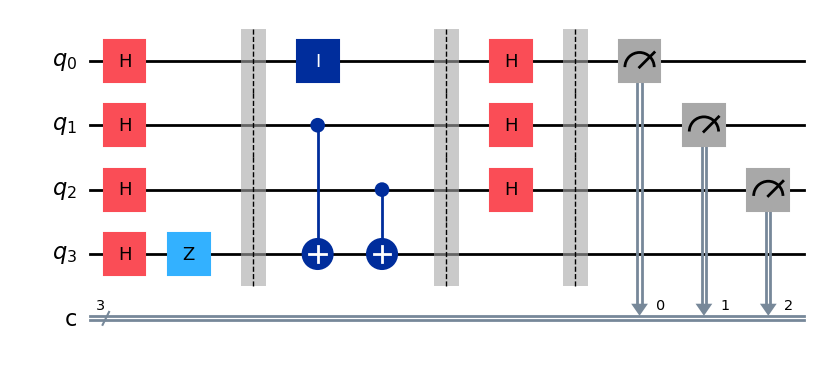

In [3]:
bv_circuit=QuantumCircuit(n+1,n)

bv_circuit.h(n)
bv_circuit.z(n)  #z is equivalent to applying x-gate and h-gate

for i in range(n):
    bv_circuit.h(i)

bv_circuit.barrier()

c=c[::-1]
for q in range(n):
    if c[q]=="0":
        bv_circuit.append(IGate(), [q])
    else:
        bv_circuit.cx(q,n)

bv_circuit.barrier()

for i in range(n):
    bv_circuit.h(i)
bv_circuit.barrier()

for i in range(n):
    bv_circuit.measure(i,i)

bv_circuit.draw('mpl')
    


no of counts: {'110': 1024}


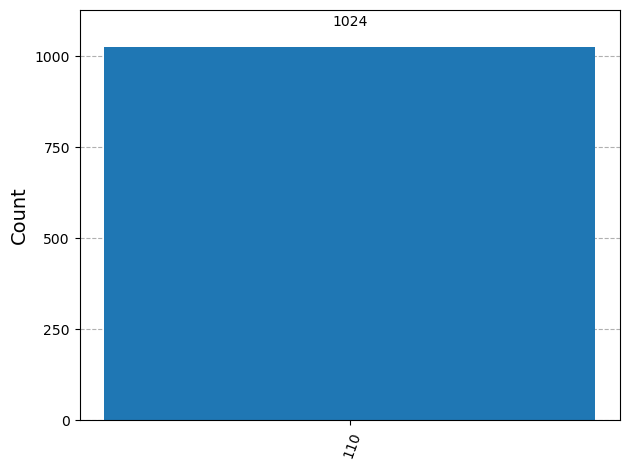

In [4]:
#Simulation using qasm simulator
backend=Aer.get_backend('qasm_simulator')

job=transpile(bv_circuit,backend)
circuit=backend.run(job)
result=circuit.result()
counts=result.get_counts(bv_circuit)
print('no of counts:',counts)

plot_histogram(counts)
#The output corrects finds the hidden string 